In [25]:
!pip install matplotlib
!apt install libproj-dev libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/v1.2.0rel.tar.gz
!pip install pyproj==1.9.6
!pip install shap

from mpl_toolkits.basemap import Basemap as Basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libproj-dev is already the newest version (4.9.3-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/matplotlib/basemap/archive/v1.2.0rel.tar.gz
  Preparing metadata (setup.py) ... done
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 15.2 MB/s eta 0:00:

In [2]:
import pandas as pd

In [3]:
url = 'https://raw.githubusercontent.com/alyshapm/coral-reef-bleaching/main/dataset/global_bleaching_environmental_comma.csv'
df = pd.read_csv(url)
df.head()

,Site_ID,Sample_ID,Data_Source,Latitude_Degrees,Longitude_Degrees,Ocean_Name,Reef_ID,Realm_Name,Ecoregion_Name,Country_Name,...,TSA_FrequencyMax,TSA_FrequencyMean,TSA_DHW,TSA_DHW_Standard_Deviation,TSA_DHWMax,TSA_DHWMean,Date,Site_Comments,Sample_Comments,Bleaching_Comments
0,2501,10324336,Donner,23.163,-82.5260,Atlantic,-9999,Tropical Atlantic,Cuba and Cayman Islands,Cuba,...,5.0,0.0,0.00,0.74,7.25,0.18,15/09/2005,-9999,-9999,-9999
1,3467,10324754,Donner,-17.575,-149.7833,Pacific,-9999,Eastern Indo-Pacific,Society Islands French Polynesia,French Polynesia,...,4.0,0.0,0.26,0.67,4.65,0.19,15/03/1991,The bleaching does not appear to have gained ...,The bleaching does not appear to have gained ...,-9999
2,1794,10323866,Donner,18.369,-64.5640,Atlantic,-9999,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United Kingdom,...,7.0,0.0,0.00,1.04,11.66,0.26,15/01/2006,-9999,-9999,-9999
3,8647,10328028,Donner,17.760,-64.5680,Atlantic,-9999,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United States,...,4.0,0.0,0.00,0.75,5.64,0.20,15/04/2006,-9999,-9999,-9999
4,8648,10328029,Donner,17.769,-64.5830,Atlantic,-9999,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United States,...,5.0,0.0,0.00,0.92,6.89,0.25,15/04/2006,-9999,-9999,-9999


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41361 entries, 0 to 41360
Data columns (total 62 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Site_ID                                41361 non-null  int64  
 1   Sample_ID                              41361 non-null  int64  
 2   Data_Source                            41361 non-null  object 
 3   Latitude_Degrees                       41361 non-null  float64
 4   Longitude_Degrees                      41361 non-null  float64
 5   Ocean_Name                             41361 non-null  object 
 6   Reef_ID                                41361 non-null  object 
 7   Realm_Name                             41361 non-null  object 
 8   Ecoregion_Name                         41361 non-null  object 
 9   Country_Name                           41361 non-null  object 
 10  State_Island_Province_Name             41361 non-null  object 
 11  Ci

In [5]:
df['Bleaching_Level'].head()

0    -9999
1    -9999
2    -9999
3    -9999
4    -9999
Name: Bleaching_Level, dtype: object

In [6]:
df=df.replace(to_replace=-9999,value=0)
df=df.replace(to_replace="-9999",value="0")
df=df.replace(to_replace="Population",value="1")

In [7]:
list(df.columns)

['Site_ID',
 'Sample_ID',
 'Data_Source',
 'Latitude_Degrees',
 'Longitude_Degrees',
 'Ocean_Name',
 'Reef_ID',
 'Realm_Name',
 'Ecoregion_Name',
 'Country_Name',
 'State_Island_Province_Name',
 'City_Town_Name',
 'Site_Name',
 'Distance_to_Shore',
 'Exposure',
 'Turbidity',
 'Cyclone_Frequency',
 'Date_Day',
 'Date_Month',
 'Date_Year',
 'Depth_m',
 'Substrate_Name',
 'Percent_Cover',
 'Bleaching_Level',
 'Percent_Bleaching',
 'ClimSST',
 'Temperature_Kelvin',
 'Temperature_Mean',
 'Temperature_Minimum',
 'Temperature_Maximum',
 'Temperature_Kelvin_Standard_Deviation',
 'Windspeed',
 'SSTA',
 'SSTA_Standard_Deviation',
 'SSTA_Mean',
 'SSTA_Minimum',
 'SSTA_Maximum',
 'SSTA_Frequency',
 'SSTA_Frequency_Standard_Deviation',
 'SSTA_FrequencyMax',
 'SSTA_FrequencyMean',
 'SSTA_DHW',
 'SSTA_DHW_Standard_Deviation',
 'SSTA_DHWMax',
 'SSTA_DHWMean',
 'TSA',
 'TSA_Standard_Deviation',
 'TSA_Minimum',
 'TSA_Maximum',
 'TSA_Mean',
 'TSA_Frequency',
 'TSA_Frequency_Standard_Deviation',
 'TSA_Fre

In [8]:
df = df[[
'Latitude_Degrees',
'Longitude_Degrees',
'Ocean_Name',
'Country_Name',
'Distance_to_Shore',
'Exposure',
'Turbidity',
'Cyclone_Frequency',
'Date_Year',
'Depth_m',
'Percent_Cover',
'Bleaching_Level',
'Percent_Bleaching',
'ClimSST',
'Temperature_Mean',
'Windspeed',
'SSTA',
'SSTA_Mean',
'SSTA_Frequency',
'SSTA_FrequencyMean',
'TSA',
'TSA_Mean',
'TSA_Frequency',
'TSA_FrequencyMean']]

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

In [10]:
plt.figure(figsize = (10,9))
m = Basemap(
         projection='merc',
         llcrnrlon=-180,
         llcrnrlat=10,
         urcrnrlon=-50,
         urcrnrlat=70,
         lat_ts=0,
         resolution='l',
         suppress_ticks=True)


<ipython-input-10-ba6d22c2199f>:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m = Basemap(


<Figure size 720x648 with 0 Axes>

In [11]:
mx, my = m(df['Longitude_Degrees'].values, df['Latitude_Degrees'].values)
pos = {}
for count, elem in enumerate (df['Country_Name']):
     pos[elem] = (mx[count], my[count])


In [12]:
df = df.loc[(df != 0).any(1)]

In [13]:
# graph = nx.from_pandas_edgelist(df, df['Country_Name'], df['Country_Name'], edge_attr=True)

In [14]:
df = df[[
'Latitude_Degrees',
'Longitude_Degrees',
'Distance_to_Shore',
'Turbidity',
'Cyclone_Frequency',
'Depth_m',
'Percent_Cover',
'Bleaching_Level',
'Percent_Bleaching',
'ClimSST',
'Windspeed',
'SSTA',
'TSA']]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41361 entries, 0 to 41360
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Latitude_Degrees   41361 non-null  float64
 1   Longitude_Degrees  41361 non-null  float64
 2   Distance_to_Shore  41361 non-null  float64
 3   Turbidity          41361 non-null  float64
 4   Cyclone_Frequency  41361 non-null  float64
 5   Depth_m            41361 non-null  float64
 6   Percent_Cover      41361 non-null  float64
 7   Bleaching_Level    41361 non-null  object 
 8   Percent_Bleaching  41361 non-null  float64
 9   ClimSST            41361 non-null  float64
 10  Windspeed          41361 non-null  float64
 11  SSTA               41361 non-null  float64
 12  TSA                41361 non-null  float64
dtypes: float64(12), object(1)
memory usage: 4.4+ MB


In [16]:
print(df["Bleaching_Level"].unique())

['0' '1']


SVM Single-class Classification

In [17]:
# importing the libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as pyoff

In [18]:
# counting the total output data from purchased column
target_balance = df['Bleaching_Level'].value_counts().reset_index()

# dividing the output classes into two sections
target_class = go.Bar(
    name = 'Target Balance',
    x = ['Not bleached', 'Bleached'],
    y = target_balance['Bleaching_Level']
)

# ploting the output classes
fig = go.Figure(target_class)
pyoff.iplot(fig)

In [19]:
# training and testing data
from sklearn.model_selection import train_test_split

# split the data into inputs and outputs
X = df.loc[:, ~df.columns.isin(["Bleaching_Level"])]
y = df['Bleaching_Level'] # target class

# assign test data size 25%
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.25, random_state=100)

In [20]:
# importing StandardScaler
from sklearn.preprocessing import StandardScaler

# scalling the input data
sc_X = StandardScaler() 
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [21]:
# Build the model with Random Forest Classifier :
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, n_estimators=10, random_state=0)

In [22]:
y_pred = model.predict(X_test)

In [23]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)**(0.5)
mse

0.24992892467873015

In [26]:
# import shap library
import shap

# explain the model's predictions using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(shap.sample(X_train,100))

# visualize the first prediction's explanation 
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train[0,:])

In [27]:
# visualize the training set predictions
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_train)

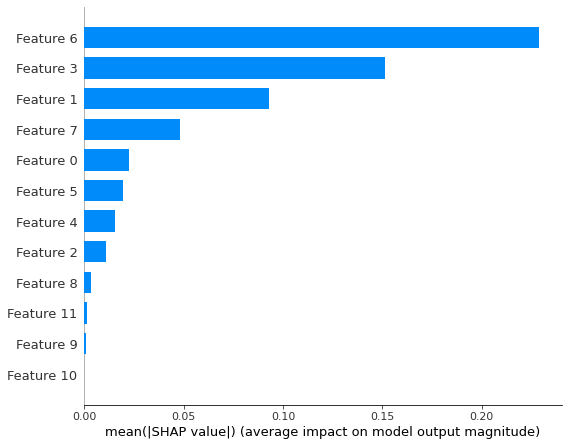

In [28]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

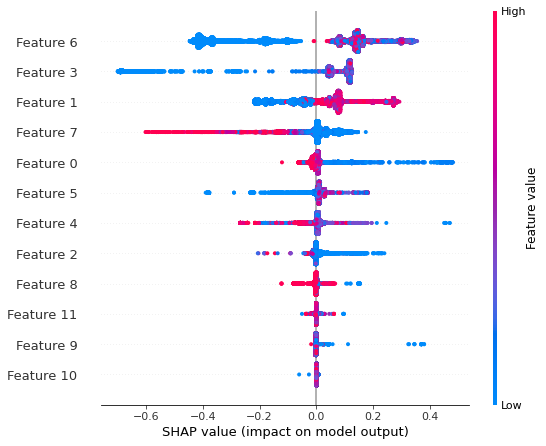

In [29]:
shap.summary_plot(shap_values, X_train)